In [19]:
#Para resolver uma incompatibilidade entre a versão do scikit-learn (sklearn) e a versão do imbalanced-learn (imblearn)

!pip install -U imbalanced-learn==0.8.0

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [45]:
# Carregar os dados do link
url = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1"
df = pd.read_csv(url)


In [46]:
# Eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True)

In [47]:
# Separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']

In [48]:
# Label encoder na variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0, 0.5, 'Contagem')

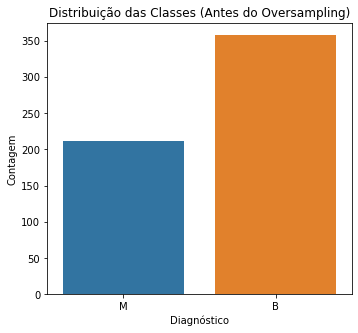

In [50]:
# Visualizar a distribuição das classes antes do oversampling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribuição das Classes (Antes do Oversampling)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')

In [51]:
# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

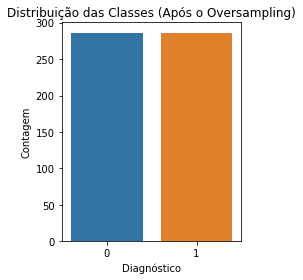

In [52]:
# Visualizar a distribuição das classes depois do oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes (Após o Oversampling)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [53]:
# Criar um modelo de regressão logística
model = LogisticRegression(random_state=20)

In [54]:
# Treinar o modelo com os dados de treinamento balanceados
model.fit(X_resampled, y_resampled)

C:\Users\55199\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [55]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [56]:
# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 0.96


Neste caso devemos evitar falsos negativos (o algoritimo diz que não tem a doença, no final das contas a pessoa realmente tem) falsos positivos é menos pior.

Nesse contexto analisamos o recall que é: Afração do verdadeiro positivos / verdadeiros positivos + falsos negativos

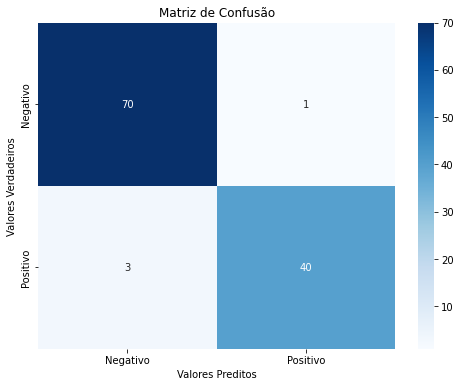

In [57]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão em um gráfico de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [58]:
# Relatório de Classificação
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



A função score retorna a precisão média do modelo nos dados de treinamento, que é a proporção de previsões corretas. Quanto mais próxima a pontuação for de 1.0, melhor o modelo está se ajustando aos dados de treinamento.

In [59]:
model.score(X_train,y_train)

0.9582417582417583

Importante avaliar o desempenho do modelo em um conjunto de dados de teste separado para verificar como ele se generaliza para dados não vistos. Isso é feito usando model.score(X_test, y_test) ou outras métricas de avaliação nos dados de teste.

In [60]:
#Retorna a precisão média do modelo nos dados de teste, que é a proporção de previsões corretas
model.score(X_test, y_test)

0.9649122807017544

Divugar metricas feitas no conjunto de teste.
Balancear conjunto de treino
Mostrar o grafico desbalanceado e o porque isso é um problema